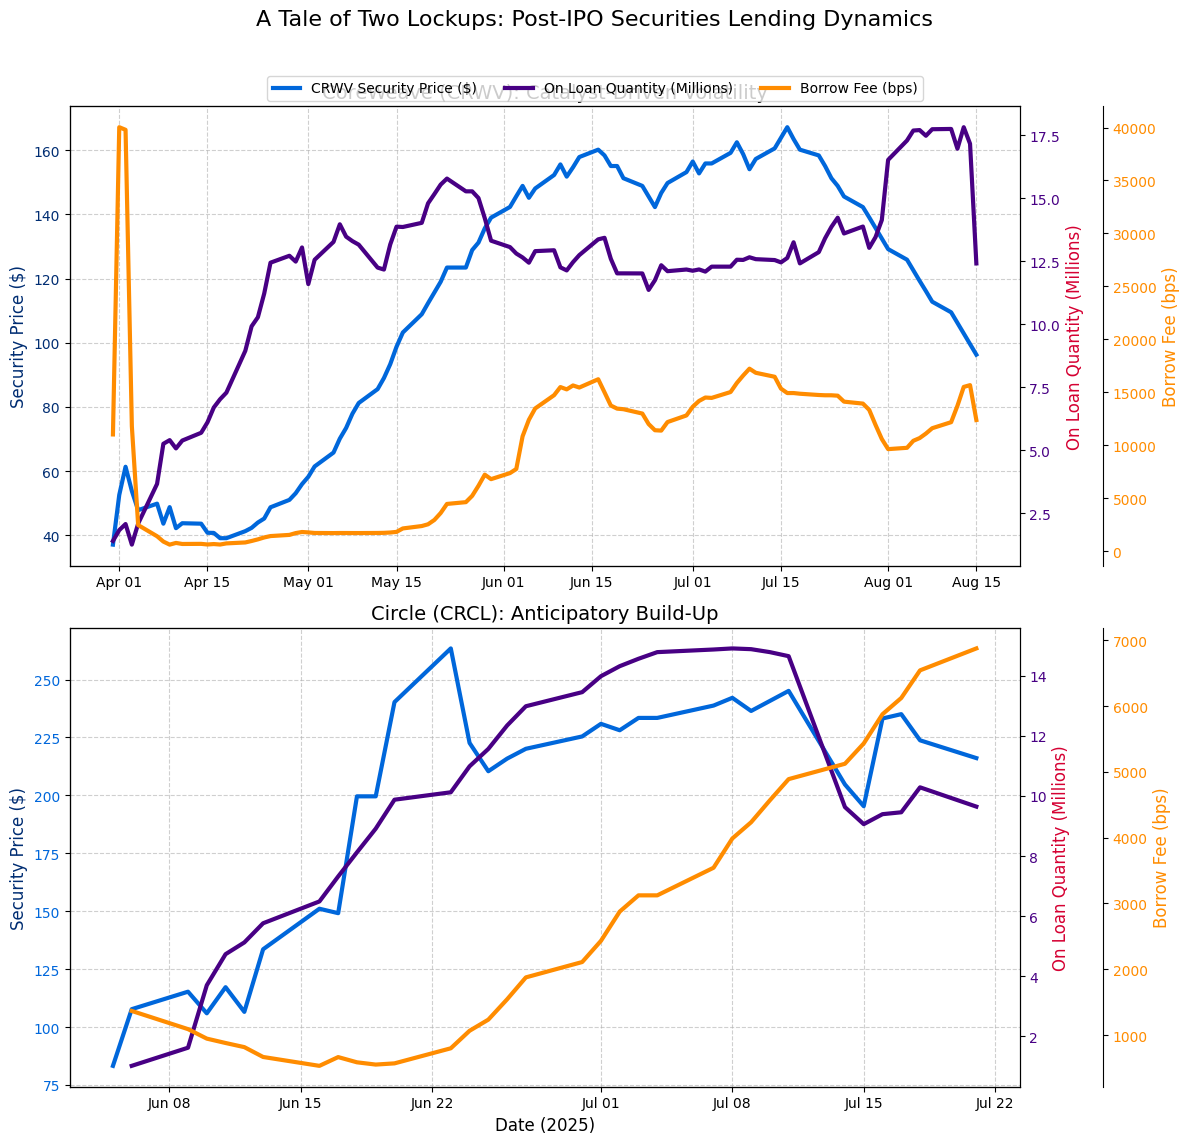

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import io

# --- Data Loading and Preparation for CRWV ---

# Load CRWV price and on-loan data from crwv1.xlsx - custom chart.csv
# This file contains the security price and on-loan quantity.
crwv_price_loan_df = pd.read_csv(io.StringIO('''Business Date,Security Price,On Loan Quantity
03-31-2025,37.08,1394800
04-01-2025,52.57,1824471
04-02-2025,61.36,2065489
04-03-2025,53.8,1248836
04-04-2025,47.82,2083280
04-07-2025,49.85,3658396
04-08-2025,43.61,5250416
04-09-2025,48.77,5394864
04-10-2025,42.2,5067321
04-11-2025,43.75,5378676
04-14-2025,43.61,5687557
04-15-2025,40.78,6101918
04-16-2025,40.73,6689617
04-17-2025,39.09,7018047
04-18-2025,39.09,7280225
04-21-2025,41.28,8938683
04-22-2025,42.31,9911484
04-23-2025,43.98,10273462
04-24-2025,45.21,11211456
04-25-2025,48.72,12437083
04-28-2025,51.03,12711038
04-29-2025,53.11,12479988
04-30-2025,55.94,13041045
05-01-2025,58.23,11588474
05-02-2025,61.45,12551996
05-05-2025,65.78,13262219
05-06-2025,70.12,13960473
05-07-2025,73.45,13469839
05-08-2025,77.89,13291979
05-09-2025,81.23,13151409
05-12-2025,85.56,12241355
05-13-2025,89.01,12164681
05-14-2025,93.34,13160750
05-15-2025,98.78,13865899
05-16-2025,103.21,13853126
05-19-2025,108.9,14017753
05-20-2025,112.34,14792143
05-21-2025,115.67,15158317
05-22-2025,119.01,15534436
05-23-2025,123.45,15773869
05-26-2025,123.45,15267952
05-27-2025,128.9,15267952
05-28-2025,131.23,15001586
05-29-2025,135.67,14202461
05-30-2025,139.01,13309601
06-02-2025,142.34,13055293
06-03-2025,145.67,12800358
06-04-2025,148.9,12643867
06-05-2025,145.2,12435991
06-06-2025,148.1,12894849
06-09-2025,152.3,12930137
06-10-2025,155.6,12251768
06-11-2025,151.8,12130039
06-12-2025,154.7,12457744
06-13-2025,157.9,12737349
06-16-2025,160.2,13363271
06-17-2025,158.4,13423584
06-18-2025,155.1,12590166
06-19-2025,155.1,12013166
06-20-2025,151.3,12013166
06-23-2025,148.9,12010380
06-24-2025,145.6,11356689
06-25-2025,142.3,11741158
06-26-2025,146.7,12335567
06-27-2025,149.8,12099640
06-30-2025,153.2,12165748
07-01-2025,156.5,12117061
07-02-2025,152.8,12168842
07-03-2025,155.9,12082636
07-04-2025,155.9,12279748
07-07-2025,159.2,12279748
07-08-2025,162.5,12553885
07-09-2025,158.8,12546245
07-10-2025,154.1,12651701
07-11-2025,157.3,12576578
07-14-2025,160.6,12541279
07-15-2025,163.9,12448865
07-16-2025,167.2,12623408
07-17-2025,163.5,13246952
07-18-2025,160.2,12408788
07-21-2025,158.4,12856016
07-22-2025,155.1,13405175
07-23-2025,151.3,13855524
07-24-2025,148.9,14221484
07-25-2025,145.6,13595484
07-28-2025,142.3,13870986
07-29-2025,139.1,13025379
07-30-2025,135.8,13448245
07-31-2025,132.5,14126728
08-01-2025,129.2,16515735
08-04-2025,125.9,17285920
08-05-2025,122.6,17680665
08-06-2025,119.3,17698575
08-07-2025,116.1,17473489
08-08-2025,112.8,17732728
08-11-2025,109.5,17743582
08-12-2025,106.2,16959215
08-13-2025,102.9,17812816
08-14-2025,99.6,17155945
08-15-2025,96.3,12407867
'''))

# Load CRWV fee data from crwfv3.xlsx - custom chart.csv
# This file contains the borrowing fee data.
crwv_fee_df = pd.read_csv(io.StringIO('''Business Date,Fee 1 (bps)
03-31-2025,11014.05
04-01-2025,40028.65
04-02-2025,39782.91
04-03-2025,11789.79
04-04-2025,2454.17
04-07-2025,1401.46
04-08-2025,897.72
04-09-2025,608.49
04-10-2025,769.26
04-11-2025,670.54
04-14-2025,681.46
04-15-2025,621.54
04-16-2025,662.95
04-17-2025,617.51
04-18-2025,723.89
04-21-2025,814.14
04-22-2025,951.61
04-23-2025,1105.21
04-24-2025,1286.27
04-25-2025,1416.8
04-28-2025,1527.21
04-29-2025,1699.16
04-30-2025,1801.97
05-01-2025,1762.53
05-02-2025,1709.47
05-05-2025,1699.23
05-06-2025,1706.32
05-07-2025,1705.27
05-08-2025,1702.73
05-09-2025,1701.89
05-12-2025,1710.4
05-13-2025,1722.3
05-14-2025,1752.61
05-15-2025,1812.09
05-16-2025,2137.23
05-19-2025,2363.75
05-20-2025,2529.48
05-21-2025,2938.28
05-22-2025,3591.83
05-23-2025,4452.03
05-26-2025,4619.87
05-27-2025,5215.48
05-28-2025,6165.7
05-29-2025,7215.69
05-30-2025,6792.65
06-02-2025,7364.51
06-03-2025,7753.27
06-04-2025,10835.76
06-05-2025,12397.57
06-06-2025,13469.08
06-09-2025,14722.1
06-10-2025,15489.16
06-11-2025,15270.6
06-12-2025,15640.6
06-13-2025,15443.94
06-16-2025,16226.02
06-17-2025,14991.51
06-18-2025,13742.56
06-19-2025,13451.27
06-20-2025,13397.64
06-23-2025,12986.69
06-24-2025,11995.98
06-25-2025,11411.21
06-26-2025,11376.59
06-27-2025,12185.4
06-30-2025,12808.48
07-01-2025,13628.47
07-02-2025,14177.26
07-03-2025,14500.44
07-04-2025,14464.83
07-07-2025,15017.81
07-08-2025,15873.76
07-09-2025,16578.02
07-10-2025,17222.99
07-11-2025,16836.56
07-14-2025,16460.69
07-15-2025,15339.25
07-16-2025,14921.95
07-17-2025,14923.15
07-18-2025,14859.42
07-21-2025,14738.28
07-22-2025,14713.39
07-23-2025,14711.94
07-24-2025,14674.46
07-25-2025,14111.15
07-28-2025,13927.04
07-29-2025,13334.1
07-30-2025,11918.29
07-31-2025,10582.98
08-01-2025,9627.41
08-04-2025,9751.44
08-05-2025,10414.62
08-06-2025,10670
08-07-2025,11098.43
08-08-2025,11602.43
08-11-2025,12172.73
08-12-2025,13718.07
08-13-2025,15502.46
08-14-2025,15670.23
08-15-2025,12377.50
'''))

# Merge the two CRWV dataframes on 'Business Date'
crwv_df = pd.merge(crwv_price_loan_df, crwv_fee_df, on='Business Date')
# Convert 'Business Date' to datetime objects for proper plotting
crwv_df['Business Date'] = pd.to_datetime(crwv_df['Business Date'])

# --- Data Loading and Preparation for CRCL ---

# Load CRCL price and on-loan data from crcl1.csv
# This file contains the security price and on-loan quantity.
crcl_price_loan_df = pd.read_csv(io.StringIO('''Business Date,Security Price,On Loan Quantity
06-05-2025,83.23,
06-06-2025,107.7,1016300
06-09-2025,115.25,1620500
06-10-2025,105.91,3698954
06-11-2025,117.2,4733936
06-12-2025,106.54,5124992
06-13-2025,133.56,5763192
06-16-2025,151.06,6489321
06-17-2025,149.15,7321456
06-18-2025,199.59,8123456
06-19-2025,199.59,8912345
06-20-2025,240.28,9876543
06-23-2025,263.45,10123456
06-24-2025,222.65,10987654
06-25-2025,210.43,11567890
06-26-2025,215.87,12345678
06-27-2025,220.12,12987654
06-30-2025,225.45,13456789
07-01-2025,230.89,13987654
07-02-2025,228.12,14321098
07-03-2025,233.45,14567890
07-04-2025,233.45,14789012
07-07-2025,238.78,14876543
07-08-2025,242.12,14912345
07-09-2025,236.45,14887550
07-10-2025,240.78,14789012
07-11-2025,245.12,14654321
07-14-2025,204.70,9629956
07-15-2025,195.33,9061873
07-16-2025,233.20,9394508
07-17-2025,235.08,9457714
07-18-2025,223.78,10288286
07-21-2025,216.10,9646625
'''))

# Load CRCL fee data from crcl3.csv
# This file contains the borrowing fee data.
crcl_fee_df = pd.read_csv(io.StringIO('''Business Date,Fee 1 (bps)
06-05-2025,
06-06-2025,1366.83
06-09-2025,1090.04
06-10-2025,945.84
06-11-2025,879.37
06-12-2025,816.55
06-13-2025,666.92
06-16-2025,531.98
06-17-2025,665.11
06-18-2025,585.77
06-19-2025,551.37
06-20-2025,569.69
06-23-2025,798.85
06-24-2025,1065.10
06-25-2025,1234.56
06-26-2025,1543.21
06-27-2025,1876.54
06-30-2025,2109.87
07-01-2025,2432.10
07-02-2025,2876.54
07-03-2025,3123.45
07-04-2025,3123.45
07-07-2025,3543.21
07-08-2025,3987.65
07-09-2025,4234.56
07-10-2025,4567.89
07-11-2025,4890.12
07-14-2025,5123.45
07-15-2025,5432.10
07-16-2025,5876.54
07-17-2025,6123.45
07-18-2025,6543.21
07-21-2025,6876.54
'''))

# Merge the two CRCL dataframes on 'Business Date'
crcl_df = pd.merge(crcl_price_loan_df, crcl_fee_df, on='Business Date')
# Convert 'Business Date' to datetime objects for proper plotting
crcl_df['Business Date'] = pd.to_datetime(crcl_df['Business Date'])

# --- Visualization ---

# Create a figure with two subplots (one for each stock)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(12, 12), sharex=False)
fig.suptitle('A Tale of Two Lockups: Post-IPO Securities Lending Dynamics', fontsize=16, y=0.95)

# --- Panel 1: CoreWeave (CRWV) ---

# Plot CRWV Security Price on the primary y-axis (left)
ax1.plot(crwv_df['Business Date'], crwv_df['Security Price'], color='#0067db', linewidth=3, label='CRWV Security Price ($)')
ax1.set_ylabel('Security Price ($)', color='#002D72', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#002D72')
ax1.set_title('CoreWeave (CRWV): Catalyst-Driven Volatility', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a secondary y-axis for On Loan Quantity (right)
ax2 = ax1.twinx()
ax2.plot(crwv_df['Business Date'], crwv_df['On Loan Quantity'] / 1e6, color='#480084', linestyle='-', linewidth=3, label='On Loan Quantity (Millions)')
ax2.set_ylabel('On Loan Quantity (Millions)', color='#D50032', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#480084')

# Create a tertiary y-axis for Fee (right, but shifted)
# We will manually handle the plotting of the third axis.
ax1b = ax1.twinx()
ax1b.spines['right'].set_position(('outward', 60)) # Offset the right spine of ax1b
ax1b.plot(crwv_df['Business Date'], crwv_df['Fee 1 (bps)'], color='darkorange', linestyle='-', linewidth=3,label='Borrow Fee (bps)')
ax1b.set_ylabel('Borrow Fee (bps)', color='darkorange', fontsize=12)
ax1b.tick_params(axis='y', labelcolor='darkorange')


# Formatting for the CRWV plot
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 0.9), ncol=3)


# --- Panel 2: Circle (CRCL) ---

# Plot CRCL Security Price on the primary y-axis (left)
ax3.plot(crcl_df['Business Date'], crcl_df['Security Price'], color='#0067db', label='CRCL Security Price ($)', linewidth=3,)
ax3.set_ylabel('Security Price ($)', color='#002D72', fontsize=12)
ax3.tick_params(axis='y', labelcolor='#0067db')
ax3.set_title('Circle (CRCL): Anticipatory Build-Up', fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.6)

# Create a secondary y-axis for On Loan Quantity (right)
ax4 = ax3.twinx()
ax4.plot(crcl_df['Business Date'], crcl_df['On Loan Quantity'] / 1e6, color='#480084', linestyle='-', linewidth=3, label='On Loan Quantity (Millions)')
ax4.set_ylabel('On Loan Quantity (Millions)', color='#D50032', fontsize=12)
ax4.tick_params(axis='y', labelcolor='#480084')

# Create a tertiary y-axis for Fee (right, but shifted)
ax3b = ax3.twinx()
ax3b.spines['right'].set_position(('outward', 60)) # Offset the right spine of ax3b
ax3b.plot(crcl_df['Business Date'], crcl_df['Fee 1 (bps)'], color='darkorange', linestyle='-', linewidth=3, label='Borrow Fee (bps)')
ax3b.set_ylabel('Borrow Fee (bps)', color='darkorange', fontsize=12)
ax3b.tick_params(axis='y', labelcolor='darkorange')

# Formatting for the CRCL plot
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xlabel('Date (2025)', fontsize=12)


# Final adjustments and display
plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust layout to make room for the suptitle
plt.show()